# Machine Learning Basics - Set 1: Implementing a Single Neuron with NumPy

**Objective:** In this notebook, you will implement a single neuron from scratch using NumPy. You will build all the necessary components: the forward pass, the activation function, the cost function, and the gradient descent optimization loop.

**Dataset:** We will use a synthetic dataset `C`, which is more challenging than the linearly separable datasets from previous exercises. The dataset consists of two features ($x_1, x_2$) and a binary class label (0 or 1).

In [2]:
# It's standard practice to put all imports at the top of the notebook.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

### Generating the Dataset

Let's generate and visualize our dataset `C`. We will use `make_moons` from scikit-learn, which creates two interleaving half-circles. This is a good example of a dataset that is not linearly separable, making it a challenge for a single neuron.

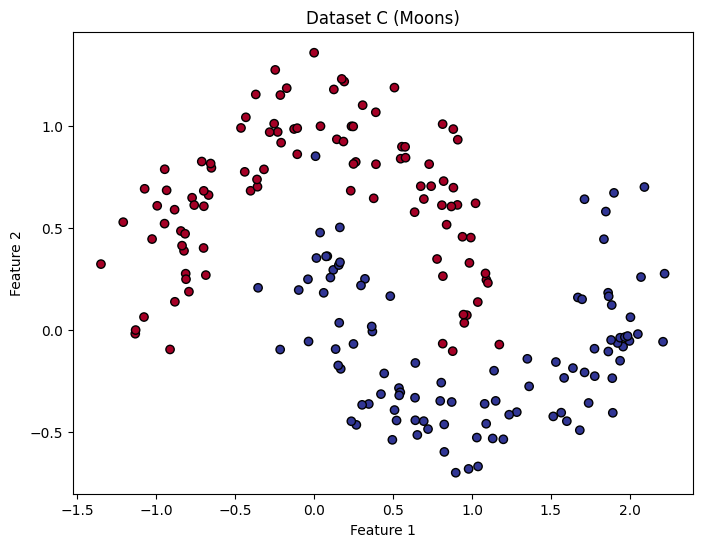

In [3]:
# Generate the dataset
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

# Reshape y to be a column vector (m, 1) instead of a row vector (m,)
# This is a common practice that simplifies matrix operations later on.
y = y.reshape(-1, 1)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title('Dataset C (Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## 1. Understanding Gradient Descent

Gradient descent is the backbone of training most machine learning models. It's an iterative optimization algorithm used to find the minimum of a function. In our case, we want to find the minimum of the **cost function**.

### 1a) Explain the concept of gradient descent in your own words.

*Double-click this cell and write your explanation here. How does this relate to model parameters, the cost function, and the learning rate?*

### 1b) Implement a cost function for a single neuron.

The cost function (or loss function) measures how wrong the model's predictions are compared to the true labels. A common choice for regression tasks, and a simple one to start with for classification, is the **Mean Squared Error (MSE)**.

The formula for MSE is:
$$ L(W, b) = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2 $$
Where:
- $m$ is the number of training examples.
- $y^{(i)}$ is the true label for the $i$-th example.
- $\hat{y}^{(i)}$ is the model's prediction for the $i$-th example.

In [4]:
def cost_function(y_true, y_pred):
    """
    Calculates the Mean Squared Error cost.
    
    Args:
        y_true (np.array): Array of true labels, shape (m, 1).
        y_pred (np.array): Array of predicted labels, shape (m, 1).
        
    Returns:
        float: The mean squared error.
    """
    # Your implementation here
    # Hint: m is the number of samples, which is the length of y_true.
    m = len(y_true)
    cost = 0 # Replace with your calculation
    
    return cost

### 1c) Derive the analytical formula for the gradient of the cost function.

To perform gradient descent, we need to know which direction to step in. This direction is given by the **gradient** of the cost function with respect to the model's parameters (weights `W` and bias `b`).

Let's derive this for a single weight, $w_j$. We'll use the chain rule.

**Recall the components:**
1.  **Cost Function (L):** $L = (y - \hat{y})^2$ (for a single sample, for simplicity)
2.  **Prediction ($\hat{y}$):** This is the output of our neuron, which is the activation of `z`. $\hat{y} = \sigma(z)$
3.  **Activation Function ($\sigma$):** We use the sigmoid function: $\sigma(z) = \frac{1}{1 + e^{-z}}$
4.  **Linear Combination (z):** $z = W^T X + b = w_1x_1 + w_2x_2 + ... + w_nx_n + b$

**The Chain Rule:**
We want to find $\frac{\partial L}{\partial w_j}$. Using the chain rule, we get:
$$ \frac{\partial L}{\partial w_j} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w_j} $$

You can do a similar thing for computing $\frac{\partial L}{\partial b}$, or decide to ignore the bias and leave it to 0 in the following steps.

**Your task:**
Calculate each of the three partial derivatives on the right-hand side and combine them to find the final expression for $\frac{\partial L}{\partial w_j}$.

*Hint: The derivative of the sigmoid function is $\sigma'(z) = \sigma(z)(1 - \sigma(z))$.*

*Double-click this cell and write down your derivation here.*

## 2. Implementing a Single Neuron

Now, let's build the core components of our neuron.

### 2a) Write a Python function to initialize weights.

The weights and bias are the parameters our model will learn. We initialize them with small random numbers to break symmetry.

In [ ]:
def initialize_weights(input_dim):
    """
    Initializes weights with small random numbers and bias with zero.
    
    Args:
        input_dim (int): The number of features in the input data (e.g., 2 for our dataset).
        
    Returns:
        tuple: A tuple containing:
            - weights (np.array): A weight vector of shape (input_dim, 1).
            - bias (float): A scalar bias term, initialized to 0.
    """
    # Your implementation here
    # Hint: Use np.random.randn and multiply it by a small factor  (e.g. 0.01) for small random weights.
    weights = None # Replace
    bias = 0.0 # Replace
    
    return weights, bias

### 2b) Implement the forward pass for a single neuron.

The forward pass calculates the neuron's output. It's a two-step process:
1.  **Linear Step:** Compute $z = X \cdot W + b$.
2.  **Activation Step:** Apply the activation function, $\hat{y} = \sigma(z)$.

In [ ]:
def forward_pass(X, weights, bias):
    """
    Computes the forward pass of the neuron.
    
    Args:
        X (np.array): Input data, shape (m, n_features).
        weights (np.array): Weight vector, shape (n_features, 1).
        bias (float): Bias term.
        
    Returns:
        tuple: A tuple containing:
            - z (np.array): The linear combination, shape (m, 1).
            - y_pred (np.array): The prediction (activation), shape (m, 1).
    """
    # Your implementation here
    # Hint: Use np.dot() (i.e. scalar product) for the matrix multiplication of X and weights.
    z = None # Replace
    y_pred = None # Replace (You will call the sigmoid function here)
    
    return z, y_pred

### 2c) Implement the sigmoid activation function.

The sigmoid function squashes its input to a value between 0 and 1. This is useful for binary classification because the output can be interpreted as a probability.

The formula is:
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

In [8]:
def sigmoid(x):
    """
    Computes the sigmoid function.
    
    Args:
        x (np.array or float): Input value(s).
        
    Returns:
        np.array or float: The sigmoid of x.
    """
    # Your implementation here
    return 0 # Replace

## 3. Gradient Descent for a Single Neuron

Now we'll implement the functions needed for the backward pass and the optimization step.

### 3a) Implement a function to calculate the gradients.

This step is also called the **backward pass**. Using the formula you derived in `1c`, you will now calculate the gradients of the cost with respect to the weights (`dW`) and the bias (`db`).


In [10]:
def calculate_gradients(X, y_true, y_pred):
    """
    Calculates the gradients of the cost function w.r.t. weights and bias.
    
    Args:
        X (np.array): Input data, shape (m, n_features).
        y_true (np.array): True labels, shape (m, 1).
        y_pred (np.array): Predicted labels, shape (m, 1).
        
    Returns:
        tuple: A tuple containing:
            - dW (np.array): Gradient w.r.t. weights, shape (n_features, 1).
            - db (float): Gradient w.r.t. bias.
    """
    m = X.shape[0]
    
    # Your implementation here
    # Hint: Use the formulas above. X.T is the transpose of X.
    # The error term is (y_pred - y_true).
    error = None # Replace
    dW = None # Replace
    db = None # Replace
    
    return dW, db

### 3b) Write a function to update the weights.

This is the core of "learning". We take a step in the opposite direction of the gradient to minimize the cost.

The update rules are:
$$ W := W - \alpha \cdot dW $$
$$ b := b - \alpha \cdot db $$

Where $\alpha$ is the **learning rate**, a hyperparameter that controls the step size.

In [11]:
def update_weights(weights, bias, dW, db, learning_rate):
    """
    Updates the weights and bias using the gradient descent rule.
    
    Args:
        weights (np.array): Current weights.
        bias (float): Current bias.
        dW (np.array): Gradient of weights.
        db (float): Gradient of bias.
        learning_rate (float): The learning rate alpha.
        
    Returns:
        tuple: A tuple containing the updated weights and bias.
    """
    # Your implementation here
    weights = None # Replace
    bias = None # Replace
    
    return weights, bias

### 3c) Implement a simple training loop.

Now, let's put everything together! The training loop will iterate for a specified number of `epochs` (one epoch is one full pass through the entire training dataset). In each epoch, it will perform the forward pass, calculate the cost and gradients, and update the weights.

In [12]:
def train_neuron(X, y, learning_rate, num_epochs):
    """
    Trains a single neuron using gradient descent.
    
    Args:
        X (np.array): Input data.
        y (np.array): True labels.
        learning_rate (float): The learning rate.
        num_epochs (int): The number of passes through the dataset.
        
    Returns:
        tuple: A tuple containing:
            - trained_weights (np.array): The final learned weights.
            - trained_bias (float): The final learned bias.
            - cost_history (list): A list of cost values at each epoch.
    """
    input_dim = X.shape[1]
    
    # 1. Initialize weights and bias
    weights, bias = initialize_weights(input_dim)
    cost_history = []
    
    # 2. Loop for num_epochs
    for i in range(num_epochs):
        # a. Forward Pass
        z, y_pred = forward_pass(X, weights, bias)
        
        # b. Calculate Cost (and append to history)
        cost = cost_function(y, y_pred)
        cost_history.append(cost)
        
        # c. Calculate Gradients (Backward Pass)
        dW, db = calculate_gradients(X, y, y_pred)
        
        # d. Update Weights
        weights, bias = update_weights(weights, bias, dW, db, learning_rate)
        
        # Optional: Print cost every 100 epochs to check progress
        if i % 100 == 0:
            print(f"Epoch {i}, Cost: {cost}")
            
    return weights, bias, cost_history

## 4. Training and Evaluation

Time to see our neuron in action!

### 4a) Train your single neuron on the dataset.

Call the `train_neuron` function you just built. You'll need to choose a `learning_rate` and the number of `num_epochs`. These are hyperparameters; you may need to tune them to get good results.

In [13]:
# Hyperparameters
learning_rate = 0.1
num_epochs = 1000

# Train the model
trained_weights, trained_bias, cost_history = train_neuron(X, y, learning_rate, num_epochs)

print("\n--- Training Complete ---")
print(f"Final Weights: \n{trained_weights}")
print(f"Final Bias: {trained_bias}")

Epoch 0, Cost: 0
Epoch 100, Cost: 0
Epoch 200, Cost: 0
Epoch 300, Cost: 0
Epoch 400, Cost: 0
Epoch 500, Cost: 0
Epoch 600, Cost: 0
Epoch 700, Cost: 0
Epoch 800, Cost: 0
Epoch 900, Cost: 0

--- Training Complete ---
Final Weights: 
None
Final Bias: None


### 4b) Plot the cost versus the number of epochs.

A decreasing cost curve is a good sign that your model is learning. If the curve is flat, the learning rate might be too small. If it's noisy or increasing, the learning rate might be too large.

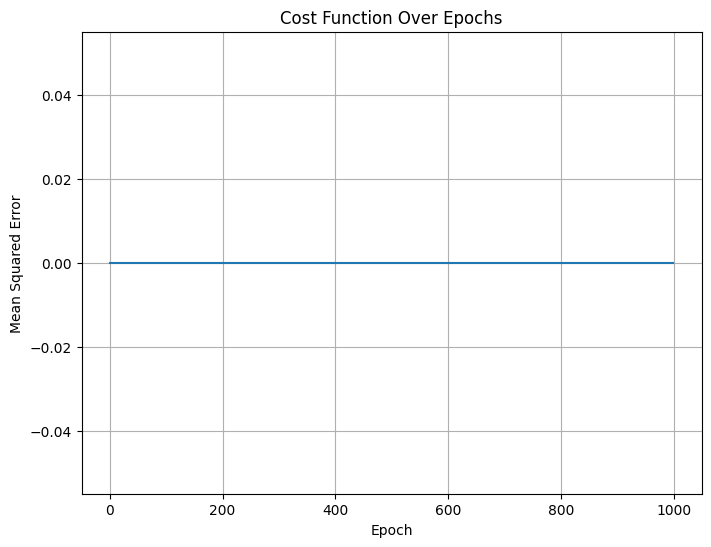

In [14]:
# Plot the cost history
plt.figure(figsize=(8, 6))
plt.plot(cost_history)
plt.title('Cost Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

### 4c) Evaluate the final predictions of your trained neuron.

To evaluate our model, we'll calculate its **accuracy**. Accuracy is the percentage of correctly classified data points.

Since our neuron outputs a probability (a value between 0 and 1), we need to convert it to a binary prediction (0 or 1). A common way to do this is to use a **decision threshold** of 0.5.
- If $\hat{y} \ge 0.5$, we predict class 1.
- If $\hat{y} < 0.5$, we predict class 0.

In [15]:
def evaluate_neuron(X, y, trained_weights, trained_bias):
    """
    Evaluates the accuracy of the trained neuron.
    
    Args:
        X (np.array): Input data.
        y (np.array): True labels.
        trained_weights (np.array): The learned weights.
        trained_bias (float): The learned bias.
        
    Returns:
        float: The accuracy of the model (0.0 to 1.0).
    """
    # 1. Get the final predictions from the model using a forward pass
    _, y_pred_proba = forward_pass(X, trained_weights, trained_bias)
    
    # 2. Convert probabilities to binary predictions (0 or 1)
    # Hint: Use a condition like (y_pred_proba >= 0.5)
    # You might want to convert the resulting boolean array to integers (0 or 1).
    y_pred_class = None # Replace
    
    # 3. Calculate accuracy
    # Hint: Accuracy = (number of correct predictions) / (total number of predictions)
    # np.mean(y_pred_class == y) is a clever way to do this.
    accuracy = 0.0 # Replace
    
    return accuracy

In [16]:
# Calculate and print the final accuracy on the training data
accuracy = evaluate_neuron(X, y, trained_weights, trained_bias)
print(f"Final Accuracy on the training set: {accuracy * 100:.2f}%")

Final Accuracy on the training set: 0.00%


## Bonus: From NumPy to PyTorch

You've done the hard work of building a neuron from scratch! This gives you a deep understanding of what's happening under the hood.

In practice, data scientists and machine learning engineers use libraries like **PyTorch** or **TensorFlow**. These libraries provide powerful tools that automate many of the steps you just implemented, allowing you to build much more complex models easily.

Let's see how our single neuron looks in PyTorch. The key ideas are exactly the same, but the implementation is more streamlined.

**The core concepts we will see are:**
1.  **Model Definition (`nn.Module`):** A class to define the architecture of our model.
2.  **Loss Function (`nn.MSELoss`):** A pre-built version of our `cost_function`.
3.  **Optimizer (`torch.optim.SGD`):** An object that handles the weight updates for us.
4.  **Automatic Differentiation (`loss.backward()`):** PyTorch automatically calculates the gradients (`dW`, `db`) for us! This is perhaps the biggest advantage.

In [17]:
# First, let's import torch and its neural network module
import torch
import torch.nn as nn

# Libraries like PyTorch work with their own data structure called a "Tensor".
# Tensors are very similar to NumPy arrays but have special properties for GPU computing
# and automatic differentiation.
# Let's convert our NumPy data to PyTorch Tensors.
X_torch = torch.from_numpy(X).float()
y_torch = torch.from_numpy(y).float()

### Defining the Model

In PyTorch, we define our model as a class that inherits from `nn.Module`.

-   **`__init__`**: In the constructor, we define the "layers" of our model. For a single neuron, this is just one **Linear layer** (`nn.Linear`). A linear layer is exactly what we implemented: $z = W \cdot X + b$. PyTorch handles the weight and bias initialization for us!
-   **`forward`**: This method defines the forward pass. We simply pass the input data through the layers we defined.

In [18]:
class SingleNeuron(nn.Module):
    def __init__(self, input_dim):
        super(SingleNeuron, self).__init__()
        # This one line replaces our `initialize_weights` function.
        # It creates a layer with `input_dim` inputs and 1 output.
        self.layer1 = nn.Linear(input_dim, 1) 
        
        # This is our activation function, available as a pre-built layer.
        self.activation = nn.Sigmoid()

    def forward(self, x):
        # This defines the forward pass, replacing our `forward_pass` function.
        # Data flows through the layers in the order you define.
        z = self.layer1(x)
        output = self.activation(z)
        return output

### The Training Loop

The training loop in PyTorch follows a standard pattern which mirrors what we did manually:

1.  **Instantiate** the model, loss function, and optimizer.
2.  **Loop** for a number of epochs.
3.  **Inside the loop:**
    a.  Perform a **forward pass** to get predictions.
    b.  Calculate the **loss**.
    c.  **Zero out** previous gradients (`optimizer.zero_grad()`).
    d.  Perform the **backward pass** to calculate gradients (`loss.backward()`). This is the automatic part!
    e.  **Update the weights** using the optimizer (`optimizer.step()`).

Epoch [0/1000], Loss: 0.2312
Epoch [100/1000], Loss: 0.1362
Epoch [200/1000], Loss: 0.1180
Epoch [300/1000], Loss: 0.1108
Epoch [400/1000], Loss: 0.1068
Epoch [500/1000], Loss: 0.1041
Epoch [600/1000], Loss: 0.1022
Epoch [700/1000], Loss: 0.1008
Epoch [800/1000], Loss: 0.0996
Epoch [900/1000], Loss: 0.0987

--- PyTorch Training Complete ---


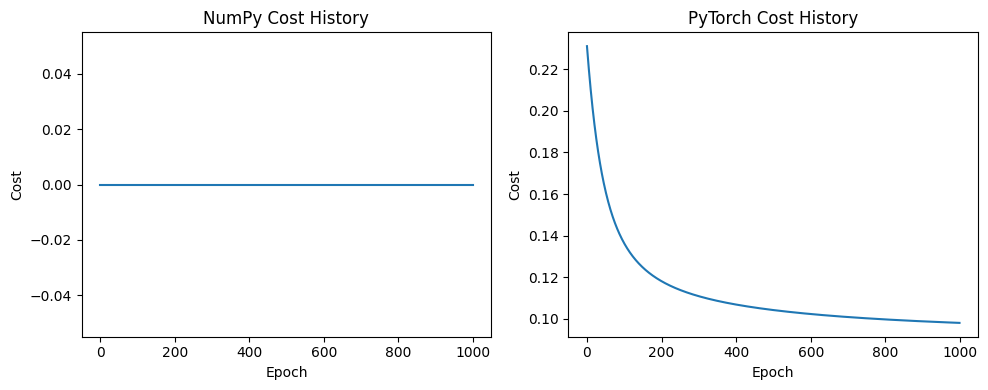

Final Accuracy on the training set (PyTorch): 0.00%


In [20]:
# --- 1. Setup ---
# Instantiate the model
input_dim = X.shape[1]
model = SingleNeuron(input_dim)

# Define the loss function (our cost_function)
criterion = nn.MSELoss()

# Define the optimizer (handles our update_weights step)
# We give it the model's parameters (weights and biases) to update.
# SGD = Stochastic Gradient Descent, adam is another popular optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# --- 2. Training Loop ---
num_epochs_torch = 1000
torch_cost_history = []

for epoch in range(num_epochs_torch):
    # a. Forward pass: Get model predictions
    outputs = model(X_torch)
    
    # b. Calculate loss
    loss = criterion(outputs, y_torch)
    torch_cost_history.append(loss.item()) # .item() gets the scalar value
    
    # c. Zero the gradients
    optimizer.zero_grad()
    
    # d. Backward pass: PyTorch computes the gradients for us!
    loss.backward()
    
    # e. Update weights: Optimizer takes a step in the right direction
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{num_epochs_torch}], Loss: {loss.item():.4f}')
        
print("\n--- PyTorch Training Complete ---")

# Let's compare the cost curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.title('NumPy Cost History')
plt.xlabel('Epoch')
plt.ylabel('Cost')

plt.subplot(1, 2, 2)
plt.plot(torch_cost_history)
plt.title('PyTorch Cost History')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

# accuracy
accuracy_torch = evaluate_neuron(X, y, model.layer1.weight.detach().numpy(), model.layer1.bias.item())
print(f"Final Accuracy on the training set (PyTorch): {accuracy_torch * 100:.2f}%")